In [9]:
%%html
<style>
table {float:left}
</style>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div align="center">
<h1>Research focus improvement</h1>
A statistical study on the effects of break during periods of focus
</div>

<div align="center">
<img src="img/muse.jpg" alt="muse headband" width="50%" height="50%">
</div>

<div align="center">
Name students:<br>
Emiel van den Brink, Jeffrey van den Elshout<br>
Student number:<br>
i432064, i425587<br>
Class:<br>
ALG1-Thursday<br>
Teacher:<br>
Peter Lambooij<br>
Version:<br>
<code>1.3</code><br>
Datum:<br>
22-02-2021<br>
</div>

---

# Version control
| Version number | Date | Author | Change |
| --- | --- | :--- | :--- |
| 1 | `22-02-2021` | Jeffrey, Emiel | Created basic layout of study |
| 1.1 | `23-02-2021` | Jeffrey, Emiel | Updated structure of document |
| 1.2 | `02-03-2021` | Jeffrey, Emiel | Added found data so far |
| 1.3 | `16-03-2021` | Jeffrey, Emiel | Migrated document to jupyter |

# Table of contents
1. [Preface](#Preface)
2. [Problem analysis](#Problem-analysis)
3. [Project goal](#Project-goal)
3. [Strategies]()
4. [Answering subquestions]()
5. [Conclusion]()
6. [Sources]()

# Preface
For this study we were primarily interested in focusing on certain tasks. This is because we had just started a TU/e course for Logic and Set theory. Because we need to be very focussed to understand the material, we wanted to see if we could increase our efficiency by taking small breaks in between tasks.

Because we do not own any equipment ourselves to actually record this data we had to borrow it. That is why we would like to thank Mama Producties B.V[1] for the use of their EEG devices and the code that was developed to receive data from the eeg device.

# Problem analysis
During certain tasks you really need to focus. It is however very tricky to stay focussed for longer periods of time.  You can lose focus quite easily when you read a chapter of a mathematics book. Or when you are driving a car. There are multiple studies on the internet that try to make a correlation between taking short breaks and an increase in focus and productivity. Our hypothesis is that taking short breaks on regular intervals will give you a longer attention span in general. We want to test this hypothesis in the following statistical study.

# Project goal
With this project we want to use statistics to determine the difference in attention span between a person focusing continuously on a task and a person taking breaks during the task.

Our hypothesis is that the person who takes breaks in between the task has a higher attention span in total.

From this initial idea we formulated the following research question:  
* Can an individual's attention span be improved by implementing short breaks at a consistent interval?

From this defining research question we extracted the following sub-questions:
* Can we use EEG equipment to measure focus?
* What  EEG data do we need to determine the length of attention span?
* What effects do short breaks have on attention span?

# Strategies
The following chapter lists each subquestions used strategies

## Can we use EEG equipment to measure focus?
### Library: Literature study
To determine if we could record if a person is currently focusing on something from EEG data. We will first need to look at other studies to determine the viability of our measurement tools.

### Workshop: Proof of concept
We have to create a basic application that allows us to receive the data from the EEG device. The code that we are using currently does not have a general app where we could record our experiments with. So this would have to be developed.

### Lab: Measuring 
After we have gathered the EEG data from the proof of concept. We have to determine if we can actually get Focus from EEG data.

---

## What  EEG data do we need to determine the length of attention span?
TODO

---

## What effects do short breaks have on attention span?
TODO

# Answering subquestions

## Can we use EEG equipment to measure focus
### Literature study
The hardware that we are using during this study is a basic EEG device. This device is the Muse. It can read five different  EEG waves in total across five sensors. These five EEG waves are the Alpha(α), Beta(β), Delta(δ), Theta(θ) and Gamma(γ) waves.

With these EEG waves, we have to determine a way to actually get a measurement for Focus. This study was not to determine if we could measure focus. So we looked for different studies where conducted to determine that algorithm.

When researching we learned that when a person starts to focus the Beta wave increases and the Theta wave decreased in intensity. So we could use those two waves to determine a value for Focus. The algorithm we will be using for this study is this:
$$ Focus = (\frac{\beta}{\theta})^2 $$

### Proof of concept
Using the code to receive EEG data and store EEG data for the Muse we got from MaMaproductions B.V. We first had to change a couple of things this is because it was not specifically designed to only record simple experiments. So we had to make some alterations.

The first thing we did was use the code to create a small custom app for Android. This app allows us to record a single experiment each time for a specific person. In the original code, it would be multiple exercises after one another.

The data from the Muse was only stored in the JSON format. We had to create a version that also saved this data in the CSV format. This way we can easily read the data in excel. This will mostly be used to quickly assess if the data is valid and make to create graphs.

After fixing some small issues in the code we were able to get accurate readings that reflected the user’s level of focus.

### Measuring
To determine if we can actually measure how long a person can focus we recorded  a few different sets of data. The first recording was a thirty second recording where we focused as much as possible for a short period of time. We then took the highest value of that recording to determine when a person was really focused. 

The second recording was a thirty second recording where we tried to be as relaxed as possible and not focusing on anything. From this set we used the lowest possible value. 

The third was me looking at a moving cube that we made as a test focus element. As you can see from this graph:

[image]

## What  EEG data do we need to determine the length of attention span
-

## What effects do short breaks have on attention span
To begin answering this question we needed to come up with a method of sampling and interpreting the data. We already described in above sections how the muse hardware can be used to get a subjects focus level for a certain time interval. We are going to build upon this and conduct an experiment where we will compare the averages from the population to determine the population mean for a focus period with and without a break.

### Experiment design
We decided to set the experiment up with a matched pair design: Each of the participants will be asked to perform both in the control group as well as the treatment group.

Participants will be asked to stare at a singular point on a screen for `8` minutes total while wearing the muse headset. Our reasoning behind this setup is that the task of staring at a single point on the screen is rather boring, and should hopefully show a significant loss of focus in a relatively short time. This way, we will be able to conduct more samples.

For the control group participants will be asked to spend these `8` minutes focussing in one single sitting. The treatment group on the other hand will have 2 periods of `4` minutes, separated by a `2` minute break.

In total we gathered a sample size of:  
$$n = 11$$  
The `.csv` file for each participant's break and no-break focus can be found in the `./Data` folder.  
The average focus for each participant are shown in the 2 tables below:

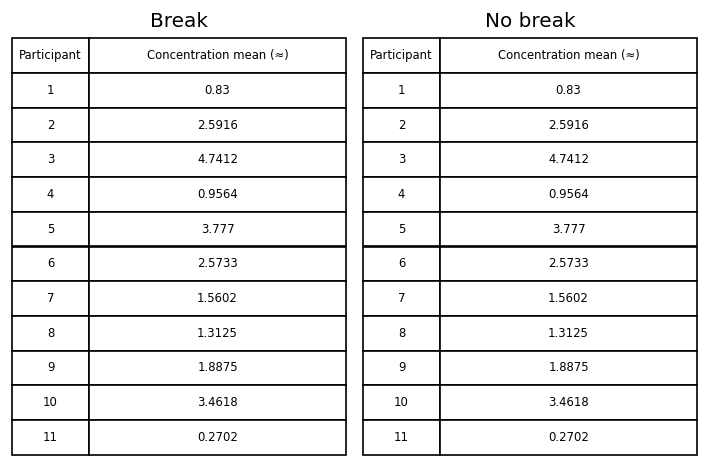

In [7]:
#maybe rework this later using seaborn
folder = "./Data/Break/Break"
break_stat = []
break_mean = []
table_data = []

for i in range(11):
    location = folder + str(i + 1) + ".csv"
    break_stat.append(pd.read_csv(location))
    break_mean.append(break_stat[i]["FocusReal"].mean())
    
for i in range(11):
    table_data.append([i+1, break_mean[i].round(4)])

fig, axs = plt.subplots(1, 2)

table_break = axs[0].table(cellText=table_data, cellLoc='center', loc='center', colLabels=["Participant", "Concentration mean (≈)"], colWidths=[0.3,1])
table_break.set_fontsize(14)
table_break.scale(1,1.5)
axs[0].axis('off')
axs[0].set_title("Break")

table_no_break = axs[1].table(cellText=table_data, cellLoc='center', loc='center', colLabels=["Participant", "Concentration mean (≈)"], colWidths=[0.3,1])
table_no_break.set_fontsize(14)
table_no_break.scale(1,1.5)
axs[1].axis('off')
axs[1].set_title("No break")

fig.dpi = 120
plt.tight_layout()
plt.show()

### Conditions for inference
-show sampling distribution

-make conclusion that conditions for inference are not met based on following:
    -distribution is (roughly) symmetrical
    -sample was not random
    -sample size was not greater than 30
    
-declare that for the sake of the study we are going to assume that the conditions for inference are met

### Extracting population means from samples
-calculate standard dev.
-extrapolate from sample mean to population mean
-etc..

# Conclusion
stump

# Sources
stump

In [11]:
print("hello world")

hello world
